# Intro to Data Visualization 

Python has lots of visualization tools from Pandas, Matplotlib and Seaborn Libraries. We'll use couples of them to
visualize data. You'll find data visualization quite interesting. The interesting fact is that we will be able to make intuition on Data 
without calculating/applying any algorthim. Let's start!

In [1]:
from IPython.display import Image
Image(url='https://user-images.githubusercontent.com/54525819/139197232-91df7152-f6a9-4149-89d6-d04ad2cf021a.jpg', width=400)

In [2]:
Image(url='https://user-images.githubusercontent.com/54525819/139198017-769e8f61-2e58-48a9-947d-fd22947a6548.png')


## 1 Import Data and Preprocess

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("penguins_size.csv")  

In [5]:
df.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
3,Adelie,NaN,NaN,NaN,NaN
4,Adelie,36.7,19.3,193.0,3450.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   culmen_length_mm   342 non-null    float64
 2   culmen_depth_mm    342 non-null    float64
 3   flipper_length_mm  342 non-null    float64
 4   body_mass_g        342 non-null    float64
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


#### Identify missing values, and replace them with the average value of the column.

In [7]:
df.isna().sum()

species              0
culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
dtype: int64

In [8]:
numeric = df.select_dtypes(include=np.number)
numeric_columns = numeric.columns
df[numeric_columns] = df[numeric_columns].fillna(df.mean())

/var/folders/bj/_x44fvhs56d3805l7szcgn0w0000gn/T/ipykernel_56774/1042495443.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[numeric_columns] = df[numeric_columns].fillna(df.mean())


#### Check the classes.
The dataset contains 3 classes, where each class refers to a type of penguins.

In [9]:
print(df.groupby('species').size())

species
Adelie       152
Chinstrap     68
Gentoo       124
dtype: int64


#### Z-score normalization of the attributes.

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = df[numeric_columns]
scaler.fit(X)
X = scaler.transform(X)
df[numeric_columns] = X
print('Z-score normlized features\n', df)

Z-score normlized features
     species  culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0    Adelie     -8.870812e-01     7.877425e-01          -1.422488    -0.565789
1    Adelie     -8.134940e-01     1.265563e-01          -1.065352    -0.503168
2    Adelie     -6.663195e-01     4.317192e-01          -0.422507    -1.192003
3    Adelie     -1.307172e-15     1.806927e-15           0.000000     0.000000
4    Adelie     -1.328605e+00     1.092905e+00          -0.565361    -0.941517
..      ...               ...              ...                ...          ...
339  Gentoo     -1.307172e-15     1.806927e-15           0.000000     0.000000
340  Gentoo      5.294731e-01    -1.450118e+00           1.006038     0.811880
341  Gentoo      1.191758e+00    -7.380718e-01           1.506028     1.939064
342  Gentoo      2.351241e-01    -1.195816e+00           0.791756     1.250229
343  Gentoo      1.099774e+00    -5.346299e-01           0.863183     1.500715

[344 rows x 5 columns]



## 2 Let's Visualize the data and get some insight on our dataset!


#### Now, let's plot histagrams on attributes.

可以看数据是单峰或双峰分布。

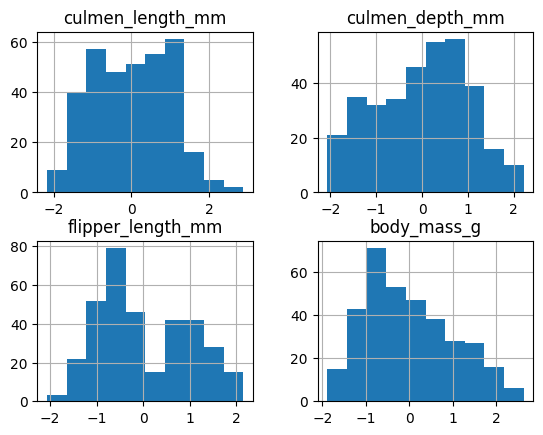

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist()
plt.show()

#### Let's try another cool pandas plotting. Yes, BOXPLOT! 

It will create boxes representing data values.


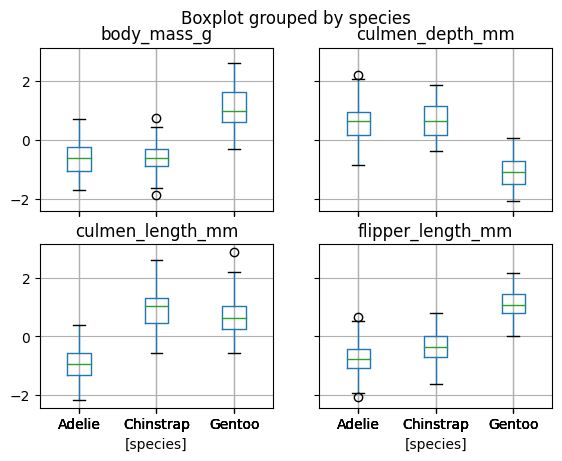

In [15]:
df.boxplot(by = 'species')
plt.show()

### Let's try Seaborn!
Seaborn has many nice functions for plotting. You can create jointplot, hisplot, pairplot, boxplot, violinplot(it's damn cool), heatmap polt etc. I recommend seaborn personally cause it has many cool ploting techniques!

#### seaborn lmplot on culmen_length_mm vs culmen_depth_mm

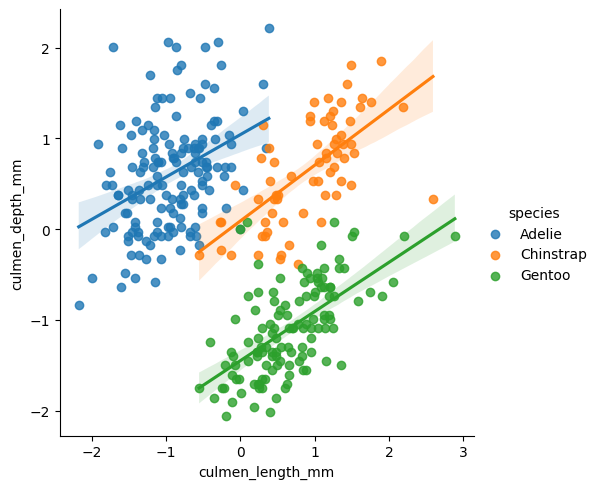

In [17]:
sns.lmplot(data = df, 
           x = 'culmen_length_mm', 
           y = 'culmen_depth_mm', 
           hue = 'species')
plt.show()

#### seaborn jointplot on culmen_length_mm vs culmen_depth_mm

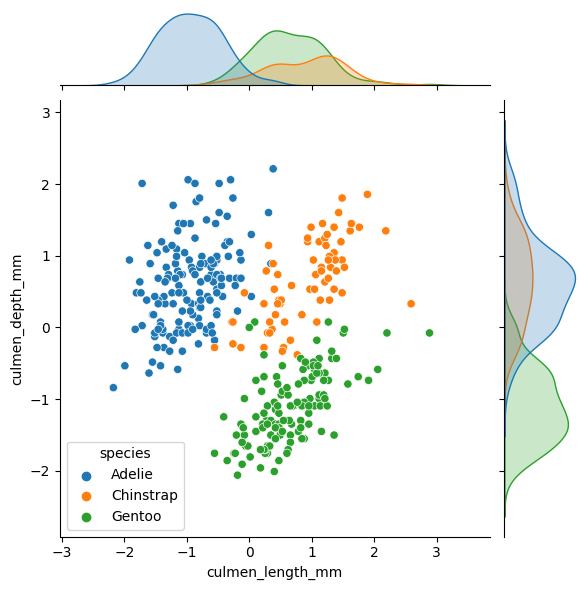

In [18]:
sns.jointplot(data = df, 
              x = 'culmen_length_mm', 
              y = 'culmen_depth_mm', 
              hue = 'species')
plt.show()

####  Correlations among attributes

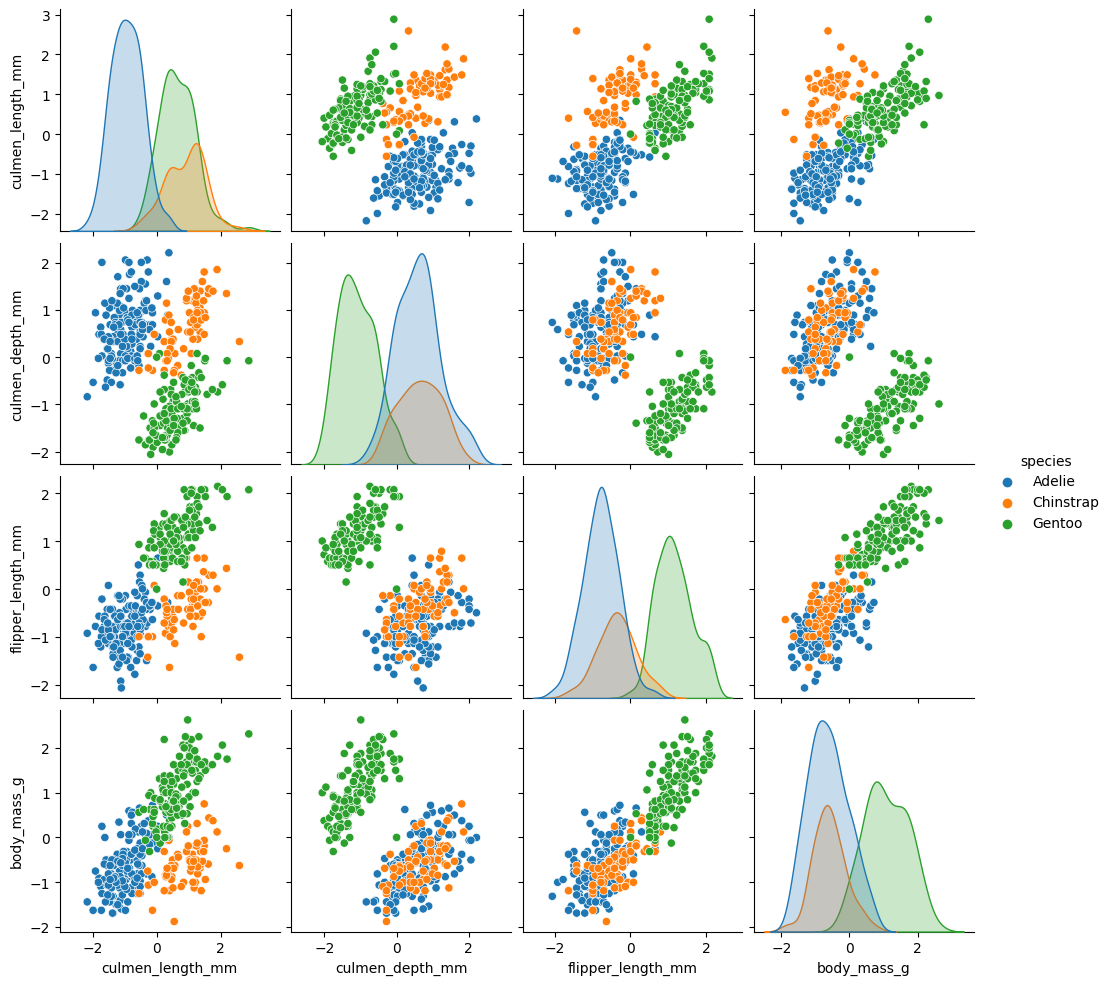

In [20]:
sns.pairplot(data = df, hue = 'species')
plt.show()

#### Pairplot shows the bivariate relation among attributes

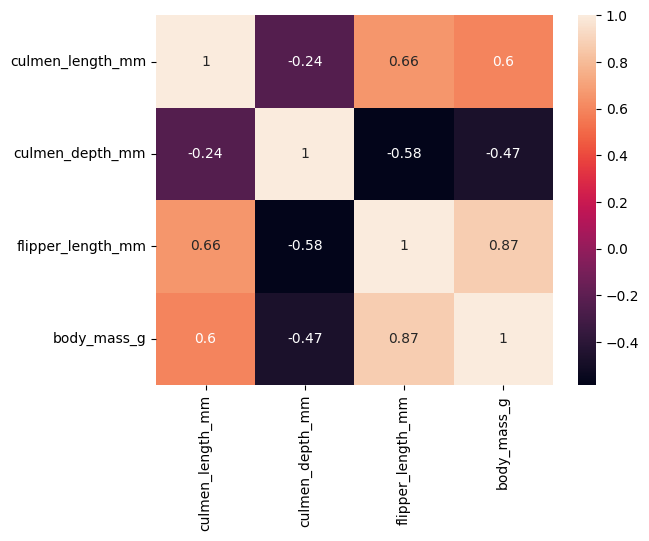

In [23]:
sns.heatmap(df[numeric_columns].corr(), annot = True)
plt.show()

#### Parallel coordinates 

Another multivariate visualization technique pandas has is parallel_coordinates. Parallel coordinates plots each attribute on a separate column & then draws lines connecting the attribute for each data sample.

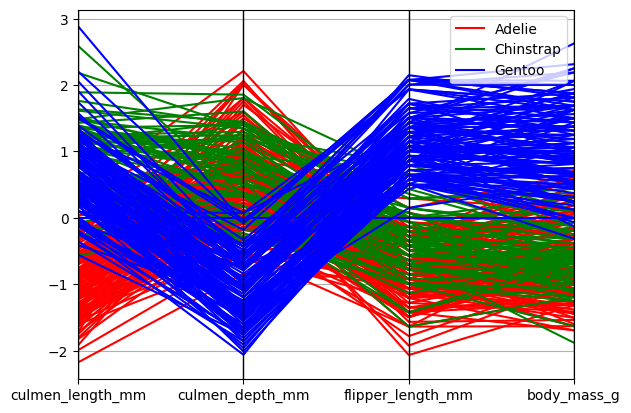

In [27]:
from pandas.plotting import parallel_coordinates

parallel_coordinates(df, 'species', color = ('r', 'g', 'b'))
plt.show()